In [1]:
!curl https://raw.githubusercontent.com/Luc-Bertin/TDs_ESILV/master/td3_discover_pandas/notes_eleves.csv -o "notes.csv"


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 21979  100 21979    0     0  21979      0  0:00:01 --:--:--  0:00:01  171k


In [2]:
df_notes = pd.read_csv("notes.csv", index_col=0)
# showing just the first n rows
df_notes.head(5)
# or the last n rows
df_notes.tail(5)
    

NameError: name 'pd' is not defined

In [3]:
import pandas as pd


In [6]:
df_notes = pd.read_csv("notes.csv", index_col=0)
# showing just the first n rows
df_notes.head(5)


,eleve,note,groupe,quizz
0,eleve0,"71,43 %",Unknown,td1
1,eleve1,100 %,Unknown,td1
2,eleve4,"71,43 %",Unknown,td1
3,eleve6,"42,86 %",Unknown,td1
4,eleve8,"57,14 %",Unknown,td1


In [7]:
# or the last n rows
df_notes.tail(5)

,eleve,note,groupe,quizz
741,eleve174,100 %,ibo5,td3
742,eleve166,"66,67 %",ibo5,td3
743,eleve176,"83,33 %",ibo5,td3
744,eleve186,100 %,ibo5,td3
745,eleve196,"66,67 %",ibo5,td3


In [8]:
def function(val):
    """A fonction to be applied on each element of a pandas DataFrame column / Series """
    # we need to return a value for each element computation
    return val.upper()


In [9]:
df_notes.eleve.apply(function) # the function applies on each value in the column

0        ELEVE0
1        ELEVE1
2        ELEVE4
3        ELEVE6
4        ELEVE8
         ...   
741    ELEVE174
742    ELEVE166
743    ELEVE176
744    ELEVE186
745    ELEVE196
Name: eleve, Length: 746, dtype: object

In [10]:
df_notes

,eleve,note,groupe,quizz
0,eleve0,"71,43 %",Unknown,td1
1,eleve1,100 %,Unknown,td1
2,eleve4,"71,43 %",Unknown,td1
3,eleve6,"42,86 %",Unknown,td1
4,eleve8,"57,14 %",Unknown,td1
...,...,...,...,...
741,eleve174,100 %,ibo5,td3
742,eleve166,"66,67 %",ibo5,td3
743,eleve176,"83,33 %",ibo5,td3
744,eleve186,100 %,ibo5,td3


In [11]:
def function(row):
    """A fonction to be applied on each row of the DataFrame
    i.e. each row is indeed a pandas.Series object 
    passed-in the applied function at each loop iteration.
    We will need later on to use axis=1 for Series to be the rows"""
    
    # having a full row we can do many things to create
    if int( row["eleve"][-1] ) % 2 == 0:
        return "pair"
    return "impair"


In [12]:
df_notes.apply(function, axis=1)

0        pair
1      impair
2        pair
3        pair
4        pair
        ...  
741      pair
742      pair
743      pair
744      pair
745      pair
Length: 746, dtype: object

In [13]:
def function(row):
    """Another function on rows but returning a pandas.Series each time
    i.e. then the final result will be a stack of pandas.Series along an axis or the other
    i.e. <=> a DataFrame"""
    if int( row["eleve"][-1] ) % 2 == 0:
        odd_or_even = "pair"
    odd_or_even = "impair"
    
    cut_note = row["note"].split(',')[0] # what precedes the comma
    return pd.Series([ odd_or_even, cut_note], index=['odd_or_even', 'cut_note'])

In [14]:
df_notes.apply(function, axis=1) # a pandas.Series for each row


,odd_or_even,cut_note
0,impair,71
1,impair,100 %
2,impair,71
3,impair,42
4,impair,57
...,...,...
741,impair,100 %
742,impair,66
743,impair,83
744,impair,100 %


In [15]:
def function(col):
    """Another function on cols this time"""
    try:
        return sum([int(x[:1]) for x in col])
    except:
        return "can't sum on this col"
    #return pd.Series([ odd_or_even, cut_note], index=['odd_or_even', 'cut_note'])

In [16]:
df_notes.apply(function, axis=0) # a pandas.Series for each col

eleve     can't sum on this col
note                       3053
groupe    can't sum on this col
quizz     can't sum on this col
dtype: object

In [17]:
df_notes.note.str[:1].astype(float).sum()

3053.0

In [18]:
df_notes["eleve"] = df_notes.eleve.str.capitalize()
df_notes

,eleve,note,groupe,quizz
0,Eleve0,"71,43 %",Unknown,td1
1,Eleve1,100 %,Unknown,td1
2,Eleve4,"71,43 %",Unknown,td1
3,Eleve6,"42,86 %",Unknown,td1
4,Eleve8,"57,14 %",Unknown,td1
...,...,...,...,...
741,Eleve174,100 %,ibo5,td3
742,Eleve166,"66,67 %",ibo5,td3
743,Eleve176,"83,33 %",ibo5,td3
744,Eleve186,100 %,ibo5,td3


In [19]:
mask = df_notes.groupe.str.startswith("U")
mask

0       True
1       True
2       True
3       True
4       True
       ...  
741    False
742    False
743    False
744    False
745    False
Name: groupe, Length: 746, dtype: bool

In [20]:
df_notes["eleve"] = df_notes.eleve.str.capitalize()
df_notes

,eleve,note,groupe,quizz
0,Eleve0,"71,43 %",Unknown,td1
1,Eleve1,100 %,Unknown,td1
2,Eleve4,"71,43 %",Unknown,td1
3,Eleve6,"42,86 %",Unknown,td1
4,Eleve8,"57,14 %",Unknown,td1
...,...,...,...,...
741,Eleve174,100 %,ibo5,td3
742,Eleve166,"66,67 %",ibo5,td3
743,Eleve176,"83,33 %",ibo5,td3
744,Eleve186,100 %,ibo5,td3


In [22]:
mask = df_notes.groupe.str.startswith("U")
mask

0       True
1       True
2       True
3       True
4       True
       ...  
741    False
742    False
743    False
744    False
745    False
Name: groupe, Length: 746, dtype: bool

In [23]:
df_notes[mask]

,eleve,note,groupe,quizz
0,Eleve0,"71,43 %",Unknown,td1
1,Eleve1,100 %,Unknown,td1
2,Eleve4,"71,43 %",Unknown,td1
3,Eleve6,"42,86 %",Unknown,td1
4,Eleve8,"57,14 %",Unknown,td1
...,...,...,...,...
87,Eleve202,"57,14 %",Unknown,td1
88,Eleve203,"57,14 %",Unknown,td1
89,Eleve204,"71,43 %",Unknown,td1
90,Eleve205,"42,86 %",Unknown,td1


In [24]:
df_notes.note.str.split(',')

0      [71, 43 %]
1         [100 %]
2      [71, 43 %]
3      [42, 86 %]
4      [57, 14 %]
          ...    
741       [100 %]
742    [66, 67 %]
743    [83, 33 %]
744       [100 %]
745    [66, 67 %]
Name: note, Length: 746, dtype: object

In [25]:
(df_notes.note
 .str.replace("%","") # replace all occurences of "%" as ""
 .str.replace(",", ".") # replace all occurences of "," as "."
 .astype(float)
)

0       71.43
1      100.00
2       71.43
3       42.86
4       57.14
        ...  
741    100.00
742     66.67
743     83.33
744    100.00
745     66.67
Name: note, Length: 746, dtype: float64

In [26]:
df_notes.note
 .str.findall("(\d+),?(\d+)?") #regex to find all matching groups in each element of the Series
 .str[0] # vectorized element access in the column, works for all iterable, hence even a list in a pd.Series, 
 .str.join(".") # join the lists with "." rather than ','
 .str.rstrip('.') # take off the last dot if exists
 .astype(float) # convert to float type
) 

IndentationError: unexpected indent (<ipython-input-26-073f59e70455>, line 2)

In [27]:
(df_notes.note
 .str.findall("(\d+),?(\d+)?") #regex to find all matching groups in each element of the Series
 .str[0] # vectorized element access in the column, works for all iterable, hence even a list in a pd.Series, 
 .str.join(".") # join the lists with "." rather than ','
 .str.rstrip('.') # take off the last dot if exists
 .astype(float) # convert to float type
) 

0       71.43
1      100.00
2       71.43
3       42.86
4       57.14
        ...  
741    100.00
742     66.67
743     83.33
744    100.00
745     66.67
Name: note, Length: 746, dtype: float64

In [28]:
serie_notes =\
( 
df_notes.note
 .str.extract("(\d+),?(\d+)?") # expand to multiple cols
 .fillna(0) # fill NaN as 0 when no matched group
 .astype(float) # convert to float
)
serie_notes[0] += serie_notes[1]/100
serie_notes.drop(1, axis=1,inplace=True)

In [29]:
df_notes.note = serie_notes

In [30]:
df_notes


,eleve,note,groupe,quizz
0,Eleve0,71.43,Unknown,td1
1,Eleve1,100.00,Unknown,td1
2,Eleve4,71.43,Unknown,td1
3,Eleve6,42.86,Unknown,td1
4,Eleve8,57.14,Unknown,td1
...,...,...,...,...
741,Eleve174,100.00,ibo5,td3
742,Eleve166,66.67,ibo5,td3
743,Eleve176,83.33,ibo5,td3
744,Eleve186,100.00,ibo5,td3


In [31]:
df_notes.groupe.value_counts(ascending=False)

ibo1       117
ibo5       115
ibo7       114
Unknown     92
ibo3        85
ibo6        85
ibo4        81
ibo2        57
Name: groupe, dtype: int64

In [32]:
pd.cut(df_notes.note, bins=5) # 5 equal sized bins

0       (60.0, 80.0]
1      (80.0, 100.0]
2       (60.0, 80.0]
3       (40.0, 60.0]
4       (40.0, 60.0]
           ...      
741    (80.0, 100.0]
742     (60.0, 80.0]
743    (80.0, 100.0]
744    (80.0, 100.0]
745     (60.0, 80.0]
Name: note, Length: 746, dtype: category
Categories (5, interval[float64]): [(-0.1, 20.0] < (20.0, 40.0] < (40.0, 60.0] < (60.0, 80.0] < (80.0, 100.0]]

In [33]:
pd.cut(df_notes.note, bins=[0, 50, 75, 100])

0       (50, 75]
1      (75, 100]
2       (50, 75]
3        (0, 50]
4       (50, 75]
         ...    
741    (75, 100]
742     (50, 75]
743    (75, 100]
744    (75, 100]
745     (50, 75]
Name: note, Length: 746, dtype: category
Categories (3, interval[int64]): [(0, 50] < (50, 75] < (75, 100]]

In [34]:
try: 
    pd.cut(df_notes.note, bins=[0, 50, 75, 100], labels=["Bad"])
except Exception as e:
    print(e)

Bin labels must be one fewer than the number of bin edges


In [35]:
df_notes['appreciation'] = pd.cut(df_notes.note, bins=[0, 25, 50, 75, 100], labels=["Very Bad", "Bad", "Ok", "Good"])
df_notes.appreciation

0        Ok
1      Good
2        Ok
3       Bad
4        Ok
       ... 
741    Good
742      Ok
743    Good
744    Good
745      Ok
Name: appreciation, Length: 746, dtype: category
Categories (4, object): [Very Bad < Bad < Ok < Good]

In [36]:
df_notes.head(3)

,eleve,note,groupe,quizz,appreciation
0,Eleve0,71.43,Unknown,td1,Ok
1,Eleve1,100.00,Unknown,td1,Good
2,Eleve4,71.43,Unknown,td1,Ok


In [37]:
df_notes.groupby('groupe') 


In [38]:
for name_group, group in df_notes.groupby('groupe'):
    # the label used , the df subset (one for each label)
    print( "label used {}, dataframe shape {}".format(name_group,group.shape)) 

label used Unknown, dataframe shape (92, 5)
label used ibo1, dataframe shape (117, 5)
label used ibo2, dataframe shape (57, 5)
label used ibo3, dataframe shape (85, 5)
label used ibo4, dataframe shape (81, 5)
label used ibo5, dataframe shape (115, 5)
label used ibo6, dataframe shape (85, 5)
label used ibo7, dataframe shape (114, 5)


In [39]:
for name_group, group in df_notes.groupby(['groupe', "quizz"]):
    # the label used , the df subset (one for each label)
    print( "label used {}, dataframe shape {}".format(name_group,group.shape)) 

label used ('Unknown', 'td1'), dataframe shape (92, 5)
label used ('ibo1', 'td1'), dataframe shape (30, 5)
label used ('ibo1', 'td2'), dataframe shape (30, 5)
label used ('ibo1', 'td3'), dataframe shape (27, 5)
label used ('ibo1', 'td4'), dataframe shape (30, 5)
label used ('ibo2', 'td2'), dataframe shape (30, 5)
label used ('ibo2', 'td3'), dataframe shape (27, 5)
label used ('ibo3', 'td2'), dataframe shape (30, 5)
label used ('ibo3', 'td3'), dataframe shape (27, 5)
label used ('ibo3', 'td4'), dataframe shape (28, 5)
label used ('ibo4', 'td2'), dataframe shape (27, 5)
label used ('ibo4', 'td3'), dataframe shape (28, 5)
label used ('ibo4', 'td4'), dataframe shape (26, 5)
label used ('ibo5', 'td1'), dataframe shape (27, 5)
label used ('ibo5', 'td2'), dataframe shape (30, 5)
label used ('ibo5', 'td3'), dataframe shape (28, 5)
label used ('ibo5', 'td4'), dataframe shape (30, 5)
label used ('ibo6', 'td2'), dataframe shape (29, 5)
label used ('ibo6', 'td3'), dataframe shape (28, 5)
label use

In [40]:
df_notes.groupby(['groupe', "quizz"])["note"]

In [41]:
for name_group, group in df_notes.groupby(['groupe', "quizz"])["note"]:
    print( "label used {}, \n{} shape {}".format(name_group, type(group), group.shape)) 

label used ('Unknown', 'td1'), 
<class 'pandas.core.series.Series'> shape (92,)
label used ('ibo1', 'td1'), 
<class 'pandas.core.series.Series'> shape (30,)
label used ('ibo1', 'td2'), 
<class 'pandas.core.series.Series'> shape (30,)
label used ('ibo1', 'td3'), 
<class 'pandas.core.series.Series'> shape (27,)
label used ('ibo1', 'td4'), 
<class 'pandas.core.series.Series'> shape (30,)
label used ('ibo2', 'td2'), 
<class 'pandas.core.series.Series'> shape (30,)
label used ('ibo2', 'td3'), 
<class 'pandas.core.series.Series'> shape (27,)
label used ('ibo3', 'td2'), 
<class 'pandas.core.series.Series'> shape (30,)
label used ('ibo3', 'td3'), 
<class 'pandas.core.series.Series'> shape (27,)
label used ('ibo3', 'td4'), 
<class 'pandas.core.series.Series'> shape (28,)
label used ('ibo4', 'td2'), 
<class 'pandas.core.series.Series'> shape (27,)
label used ('ibo4', 'td3'), 
<class 'pandas.core.series.Series'> shape (28,)
label used ('ibo4', 'td4'), 
<class 'pandas.core.series.Series'> shape (2

In [42]:
df_notes.dtypes 

eleve             object
note             float64
groupe            object
quizz             object
appreciation    category
dtype: object

In [43]:
df_notes.groupby(['groupe'])["note"].mean()

groupe
Unknown    63.664022
ibo1       87.337607
ibo2       97.251053
ibo3       86.418824
ibo4       87.953580
ibo5       80.288957
ibo6       83.484000
ibo7       86.402456
Name: note, dtype: float64

In [44]:
df_notes.groupby(['groupe', 'quizz'])["note"].mean()

groupe   quizz
Unknown  td1      63.664022
ibo1     td1      67.618000
         td2      94.666667
         td3      90.739630
         td4      96.666333
ibo2     td2      98.666667
         td3      95.678148
ibo3     td2      88.666667
         td3      88.887037
         td4      81.630357
ibo4     td2      87.407407
         td3      87.500000
         td4      89.009231
ibo5     td1      53.967407
         td2      90.000000
         td3      90.475714
         td4      84.759667
ibo6     td2      90.344828
         td3      83.332857
         td4      76.529286
ibo7     td1      74.875517
         td2      85.714286
         td3      94.642500
         td4      90.637931
Name: note, dtype: float64

In [45]:
_.unstack()

quizz,td1,td2,td3,td4
groupe,,,,
Unknown,63.664022,NaN,NaN,NaN
ibo1,67.618000,94.666667,90.739630,96.666333
ibo2,NaN,98.666667,95.678148,NaN
ibo3,NaN,88.666667,88.887037,81.630357
ibo4,NaN,87.407407,87.500000,89.009231
ibo5,53.967407,90.000000,90.475714,84.759667
ibo6,NaN,90.344828,83.332857,76.529286
ibo7,74.875517,85.714286,94.642500,90.637931


In [46]:
df_notes.isnull().sum()

eleve           0
note            0
groupe          0
quizz           0
appreciation    2
dtype: int64

In [47]:
df_notes.isnull().apply(sum, axis=0)

eleve           0
note            0
groupe          0
quizz           0
appreciation    2
dtype: int64

In [48]:
df_notes[df_notes.groupe == "Unknown"]

,eleve,note,groupe,quizz,appreciation
0,Eleve0,71.43,Unknown,td1,Ok
1,Eleve1,100.00,Unknown,td1,Good
2,Eleve4,71.43,Unknown,td1,Ok
3,Eleve6,42.86,Unknown,td1,Bad
4,Eleve8,57.14,Unknown,td1,Ok
...,...,...,...,...,...
87,Eleve202,57.14,Unknown,td1,Ok
88,Eleve203,57.14,Unknown,td1,Ok
89,Eleve204,71.43,Unknown,td1,Ok
90,Eleve205,42.86,Unknown,td1,Bad


In [49]:
_.shape[0]

92

In [50]:
df_notes.groupby('quizz').agg({'note': ['max', min]})

note       
         max    min
quizz              
td1    100.0   0.00
td2    100.0  40.00
td3    100.0  50.00
td4    100.0  42.86

In [51]:
_.columns

MultiIndex([('note', 'max'),
            ('note', 'min')],
           )

In [52]:
df_notes.groupby('eleve').agg(list)
# applied on all columns (where the function can be used on) for each subset

,note,groupe,quizz,appreciation
eleve,,,,
Eleve0,"[71.43, 80.0, 100.0]","[Unknown, ibo2, ibo2]","[td1, td2, td3]","[Ok, Good, Good]"
Eleve1,"[100.0, 100.0, 100.0]","[Unknown, ibo2, ibo2]","[td1, td2, td3]","[Good, Good, Good]"
Eleve10,"[100.0, 100.0, 85.71, 71.43]","[ibo7, ibo7, ibo7, ibo7]","[td3, td2, td4, td1]","[Good, Good, Good, Ok]"
Eleve100,"[100.0, 100.0, 100.0, 85.71]","[ibo7, ibo7, ibo7, ibo7]","[td3, td2, td4, td1]","[Good, Good, Good, Good]"
Eleve101,"[100.0, 100.0, 85.71, 100.0]","[ibo7, ibo7, ibo7, ibo7]","[td3, td2, td4, td1]","[Good, Good, Good, Good]"
...,...,...,...,...
Eleve95,"[85.71, 100.0, 100.0]","[Unknown, ibo2, ibo2]","[td1, td2, td3]","[Good, Good, Good]"
Eleve96,"[100.0, 100.0, 100.0, 42.86]","[ibo1, ibo1, ibo1, ibo1]","[td4, td3, td2, td1]","[Good, Good, Good, Bad]"
Eleve97,"[28.57, 85.71, 83.33, 60.0]","[Unknown, ibo4, ibo4, ibo4]","[td1, td4, td3, td2]","[Bad, Good, Good, Ok]"


In [53]:
df_notes

,eleve,note,groupe,quizz,appreciation
0,Eleve0,71.43,Unknown,td1,Ok
1,Eleve1,100.00,Unknown,td1,Good
2,Eleve4,71.43,Unknown,td1,Ok
3,Eleve6,42.86,Unknown,td1,Bad
4,Eleve8,57.14,Unknown,td1,Ok
...,...,...,...,...,...
741,Eleve174,100.00,ibo5,td3,Good
742,Eleve166,66.67,ibo5,td3,Ok
743,Eleve176,83.33,ibo5,td3,Good
744,Eleve186,100.00,ibo5,td3,Good


In [54]:
df_notes.replace({"Unknown":np.nan}, inplace=True)

NameError: name 'np' is not defined

In [55]:
import numpy as np


In [56]:
df_notes.replace({"Unknown":np.nan}, inplace=True)

In [57]:
df_notes["groupe"] = df_notes.groupby('eleve')['groupe'].transform(lambda x: x.bfill().ffill())


In [58]:
df_notes.groupby('eleve').agg(list)

,note,groupe,quizz,appreciation
eleve,,,,
Eleve0,"[71.43, 80.0, 100.0]","[ibo2, ibo2, ibo2]","[td1, td2, td3]","[Ok, Good, Good]"
Eleve1,"[100.0, 100.0, 100.0]","[ibo2, ibo2, ibo2]","[td1, td2, td3]","[Good, Good, Good]"
Eleve10,"[100.0, 100.0, 85.71, 71.43]","[ibo7, ibo7, ibo7, ibo7]","[td3, td2, td4, td1]","[Good, Good, Good, Ok]"
Eleve100,"[100.0, 100.0, 100.0, 85.71]","[ibo7, ibo7, ibo7, ibo7]","[td3, td2, td4, td1]","[Good, Good, Good, Good]"
Eleve101,"[100.0, 100.0, 85.71, 100.0]","[ibo7, ibo7, ibo7, ibo7]","[td3, td2, td4, td1]","[Good, Good, Good, Good]"
...,...,...,...,...
Eleve95,"[85.71, 100.0, 100.0]","[ibo2, ibo2, ibo2]","[td1, td2, td3]","[Good, Good, Good]"
Eleve96,"[100.0, 100.0, 100.0, 42.86]","[ibo1, ibo1, ibo1, ibo1]","[td4, td3, td2, td1]","[Good, Good, Good, Bad]"
Eleve97,"[28.57, 85.71, 83.33, 60.0]","[ibo4, ibo4, ibo4, ibo4]","[td1, td4, td3, td2]","[Bad, Good, Good, Ok]"


In [59]:
df_notes.groupby(['groupe', 'quizz'])["note"].mean().unstack()

quizz,td1,td2,td3,td4
groupe,,,,
ibo1,67.618000,94.666667,90.739630,96.666333
ibo2,76.846207,98.666667,95.678148,NaN
ibo3,40.002000,88.666667,88.887037,81.630357
ibo4,56.632500,87.407407,87.500000,89.009231
ibo5,53.967407,90.000000,90.475714,84.759667
ibo6,61.427667,90.344828,83.332857,76.529286
ibo7,74.875517,85.714286,94.642500,90.637931


In [60]:
df_notes[(df_notes.groupe == 'ibo2') & (df_notes.quizz == 'td4')]

,eleve,note,groupe,quizz,appreciation


In [61]:
df_notes = df_notes[~(df_notes.quizz=='td4')]

In [62]:
df_notes


,eleve,note,groupe,quizz,appreciation
0,Eleve0,71.43,ibo2,td1,Ok
1,Eleve1,100.00,ibo2,td1,Good
2,Eleve4,71.43,ibo2,td1,Ok
3,Eleve6,42.86,ibo6,td1,Bad
4,Eleve8,57.14,ibo4,td1,Ok
...,...,...,...,...,...
741,Eleve174,100.00,ibo5,td3,Good
742,Eleve166,66.67,ibo5,td3,Ok
743,Eleve176,83.33,ibo5,td3,Good
744,Eleve186,100.00,ibo5,td3,Good


In [63]:
df_notes.groupby(['groupe', 'quizz'])["note"].mean().unstack()

quizz,td1,td2,td3
groupe,,,
ibo1,67.618000,94.666667,90.739630
ibo2,76.846207,98.666667,95.678148
ibo3,40.002000,88.666667,88.887037
ibo4,56.632500,87.407407,87.500000
ibo5,53.967407,90.000000,90.475714
ibo6,61.427667,90.344828,83.332857
ibo7,74.875517,85.714286,94.642500


In [64]:
df_notes.pivot_table('note', index='groupe', columns='quizz', margins=True)

quizz,td1,td2,td3,All
groupe,,,,
ibo1,67.618000,94.666667,90.739630,84.120805
ibo2,76.846207,98.666667,95.678148,90.370349
ibo3,40.002000,88.666667,88.887037,84.838065
ibo4,56.632500,87.407407,87.500000,77.056747
ibo5,53.967407,90.000000,90.475714,78.711059
ibo6,61.427667,90.344828,83.332857,78.116667
ibo7,74.875517,85.714286,94.642500,84.957412
All,64.686180,90.882353,90.154715,82.528696


In [65]:
results = df_notes.pivot_table(index='groupe', columns='quizz', 
                     aggfunc={"note":['max', min]})
results

note                                  
           max                  min             
quizz      td1    td2    td3    td1   td2    td3
groupe                                          
ibo1    100.00  100.0  100.0  28.57  80.0  50.00
ibo2    100.00  100.0  100.0  42.86  80.0  83.33
ibo3     57.14  100.0  100.0  14.29  40.0  66.67
ibo4    100.00  100.0  100.0   0.00  40.0  66.67
ibo5     85.71  100.0  100.0   0.00  60.0  50.00
ibo6    100.00  100.0  100.0  28.57  40.0  50.00
ibo7    100.00  100.0  100.0  28.57  40.0  66.67

In [66]:
%matplotlib inline

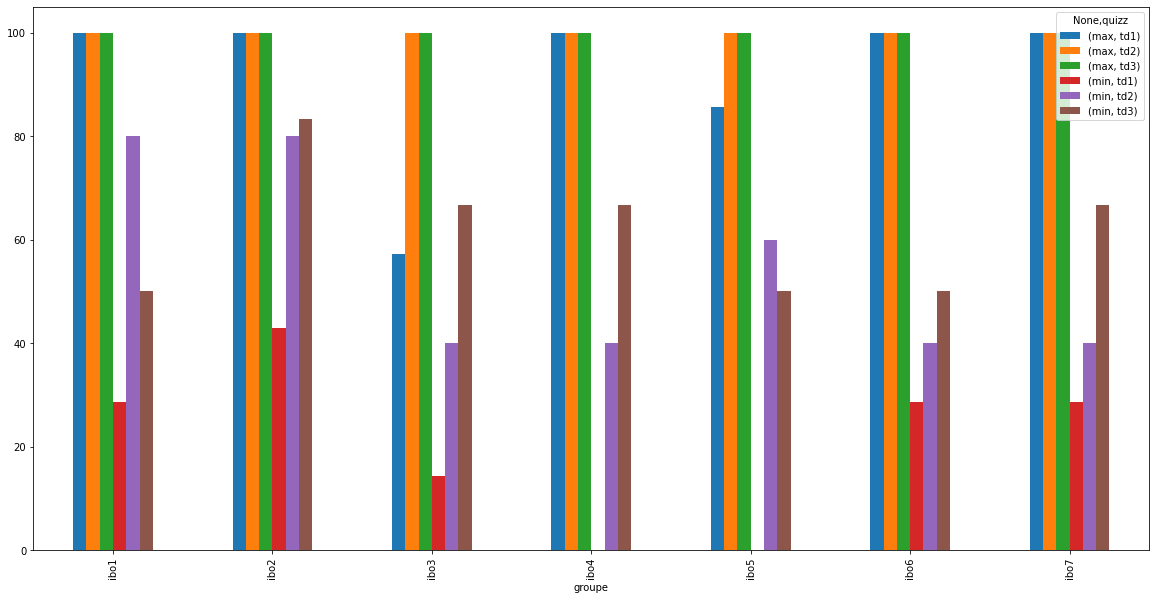

In [67]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
results['note'].plot(kind='bar')

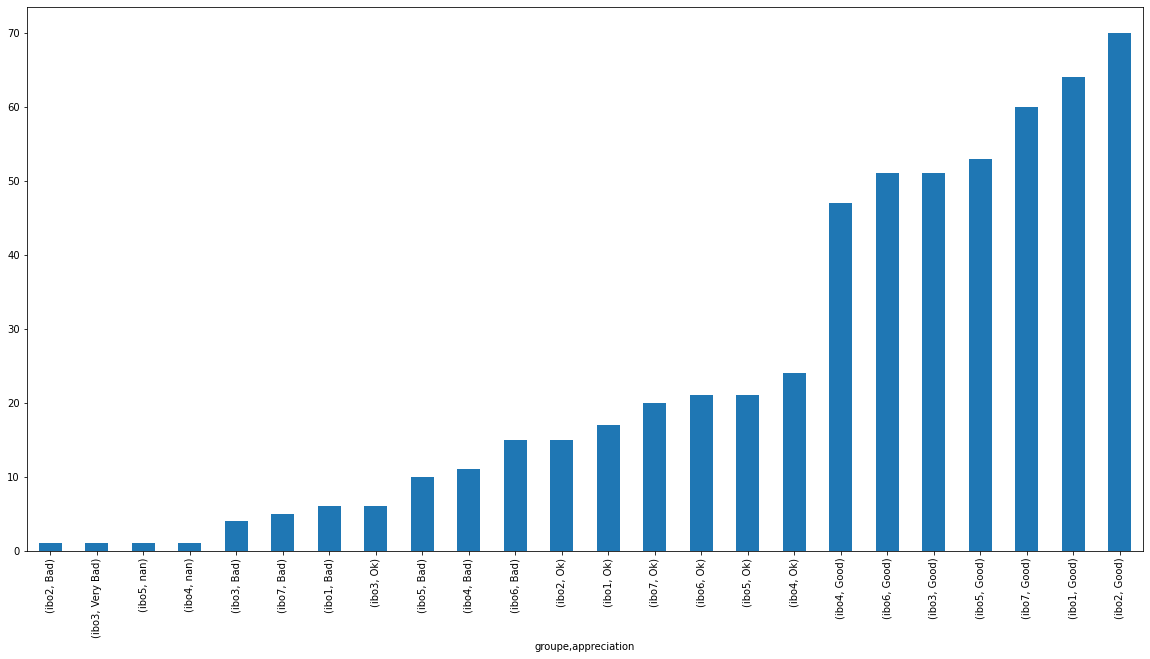

In [68]:
df_notes.groupby('groupe').appreciation.value_counts(dropna=False).sort_values().plot(kind="bar")


In [69]:
(df_notes.
     .groupby(['quizz','groupe'])
     ['appreciation']
     .value_counts().sort_index()
     .plot(kind="bar"))

SyntaxError: invalid syntax (<ipython-input-69-fb71aa69dd3f>, line 2)

In [70]:
(df_notes.
     .groupby(['quizz','groupe'])
     ['appreciation']
     .value_counts().sort_index()
     .plot(kind="bar"))

SyntaxError: invalid syntax (<ipython-input-70-fb71aa69dd3f>, line 2)

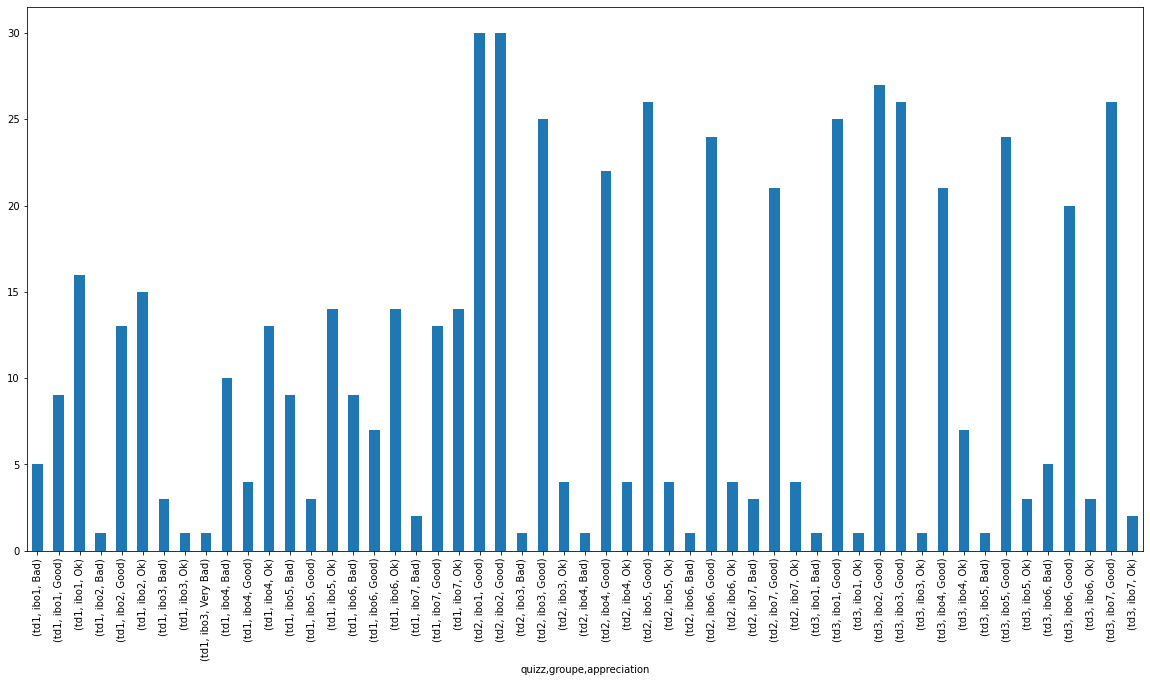

In [71]:
(df_notes.groupby(['quizz','groupe'])
     ['appreciation']
     .value_counts().sort_index()
     .plot(kind="bar"))

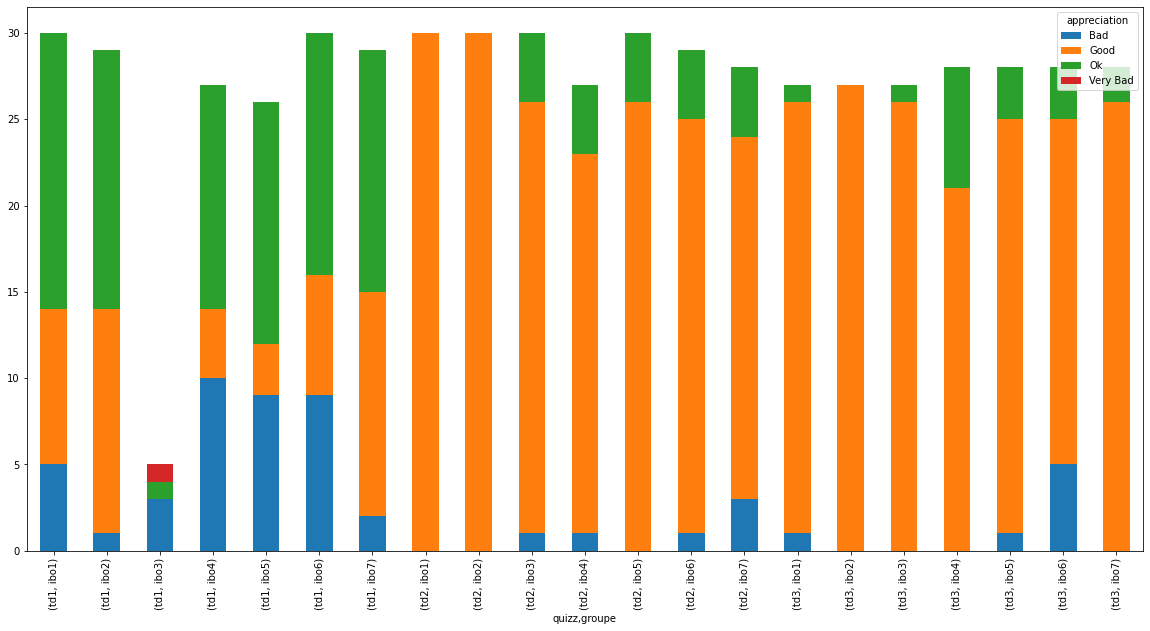

In [72]:
(df_notes
     .groupby(['quizz','groupe'])
     ['appreciation']
     .value_counts()
     .unstack().plot(kind='bar', stacked=True))

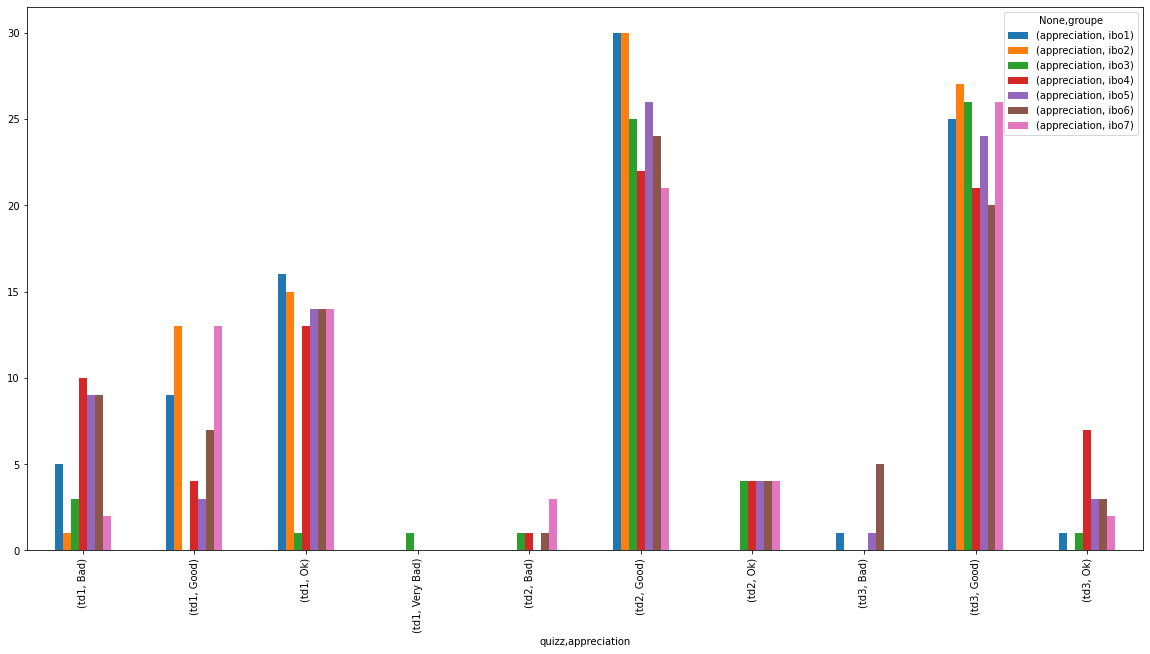

In [73]:
(df_notes
     .pivot_table(index='quizz', 
                  columns='groupe', 
                  aggfunc={'appreciation':'value_counts'})
     .plot(kind="bar"))

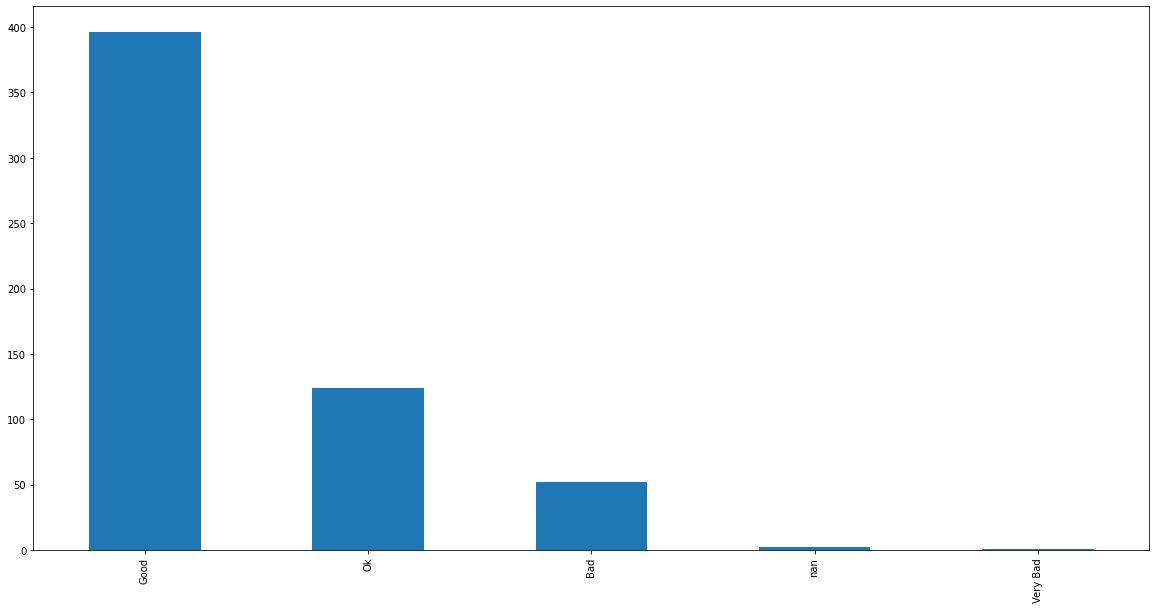

In [74]:
df_notes.appreciation.value_counts(dropna=False).plot(kind="bar")

In [75]:
df_notes[pd.isna(df_notes.appreciation)]

,eleve,note,groupe,quizz,appreciation
75,Eleve183,0.0,ibo4,td1,NaN
525,Eleve111,0.0,ibo5,td1,NaN
